In [98]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data visualization
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import accuracy_score

# ML Packages
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import tensorflow as tf


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [99]:
train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [100]:
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test_data 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


# Preprocessing Data

##### Checking missing values in each feature

In [101]:
print(f"Train Data Shape:{train_data.shape}\n\n")
print(f"Train Data Details:\n{train_data.describe()}\n\n")
print(f"Train Data Info:\n{train_data.info}")

Train Data Shape:(8693, 14)


Train Data Details:
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


Train Data Info:
<bound method DataFrame.info o

In [102]:
nan_count = train_data.isna().sum().sort_values(ascending=False)
nan_count

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

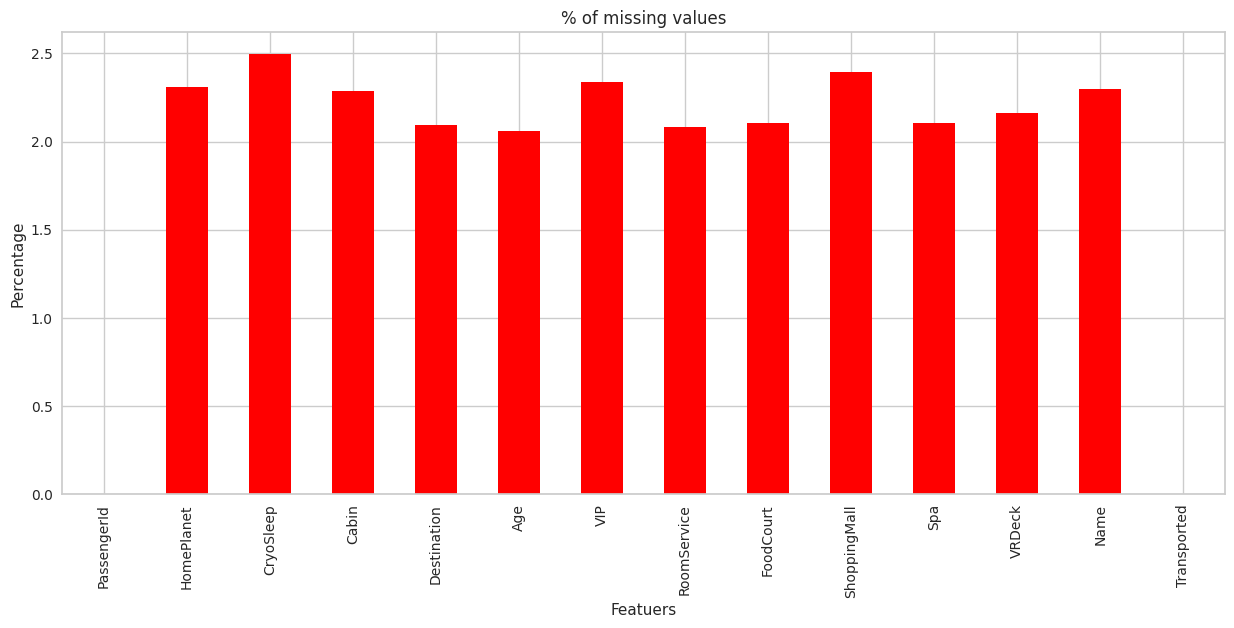

In [103]:
# Checking the percentage of missing values
missing_value_percentage = train_data.isnull().mean() * 100

# Bar plot
plt.figure(figsize=(15,6))
missing_value_percentage.plot(kind='bar',color='red')
plt.title('% of missing values')
plt.xlabel('Featuers')
plt.ylabel('Percentage')
plt.show()

In [104]:
## Checking features types
numerical_features = train_data.select_dtypes(include=['int64','float64']).columns
categorical_features = train_data.select_dtypes(include=['object']).columns
bool_features = train_data.select_dtypes(include=['bool']).columns

print('\nNumerical data:', numerical_features)
print('\nCategorical data:', categorical_features)
print('\nBoolean data:', bool_features)


Numerical data: Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

Categorical data: Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

Boolean data: Index(['Transported'], dtype='object')


##### Filling Missing Values

In [105]:
## Inefficient way
####train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

### Better way
for feature in train_data.columns:
    if train_data[feature].dtypes == 'object':
        train_data[feature] = train_data[feature].fillna(train_data[feature].mode()[0])
    else:
        train_data[feature] = train_data[feature].fillna(train_data[feature].median())
print(train_data.shape)

(8693, 14)


In [106]:
for feature in test_data.columns:
    if test_data[feature].dtypes == 'object':
        test_data[feature] = test_data[feature].fillna(test_data[feature].mode()[0])
    else:
        test_data[feature] = test_data[feature].fillna(test_data[feature].median())
print(test_data.shape)

(4277, 13)


##### Label Encoding

In [107]:
# Converting categorical data in numberical data

## Inefficient way
# label_encoder = preprocessing.LabelEncoder()
# train_data['HomePlanet'] = label_encoder.fit_transform(train_data['HomePlanet'])

# label_encoder = preprocessing.LabelEncoder()
# train_data['CryoSleep'] = label_encoder.fit_transform(train_data['CryoSleep'])

# label_encoder = preprocessing.LabelEncoder()
# train_data['VIP'] = label_encoder.fit_transform(train_data['VIP'])

# label_encoder = preprocessing.LabelEncoder()
# train_data['Cabin'] = label_encoder.fit_transform(train_data['Cabin'])

# label_encoder = preprocessing.LabelEncoder()
# train_data['Destination'] = label_encoder.fit_transform(train_data['Destination'])

## Better Way
labelencoder = LabelEncoder()

## Training Data
for feature in train_data.columns:
    if train_data[feature].dtypes == 'object':
        train_data[feature]=labelencoder.fit_transform(train_data[feature])
        
## Test Data
object_columns = test_data.select_dtypes(include='object').columns.difference(['PassengerId'])

for feature in object_columns:
    test_data[feature] = labelencoder.fit_transform(test_data[feature])

# EDA

### Countplot

In [108]:
print(train_data['HomePlanet'].value_counts())
print(train_data['CryoSleep'].value_counts())
print(train_data['Destination'].value_counts())
print(train_data['VIP'].value_counts())

HomePlanet
0    4803
1    2131
2    1759
Name: count, dtype: int64
CryoSleep
False    5656
True     3037
Name: count, dtype: int64
Destination
2    6097
0    1800
1     796
Name: count, dtype: int64
VIP
False    8494
True      199
Name: count, dtype: int64


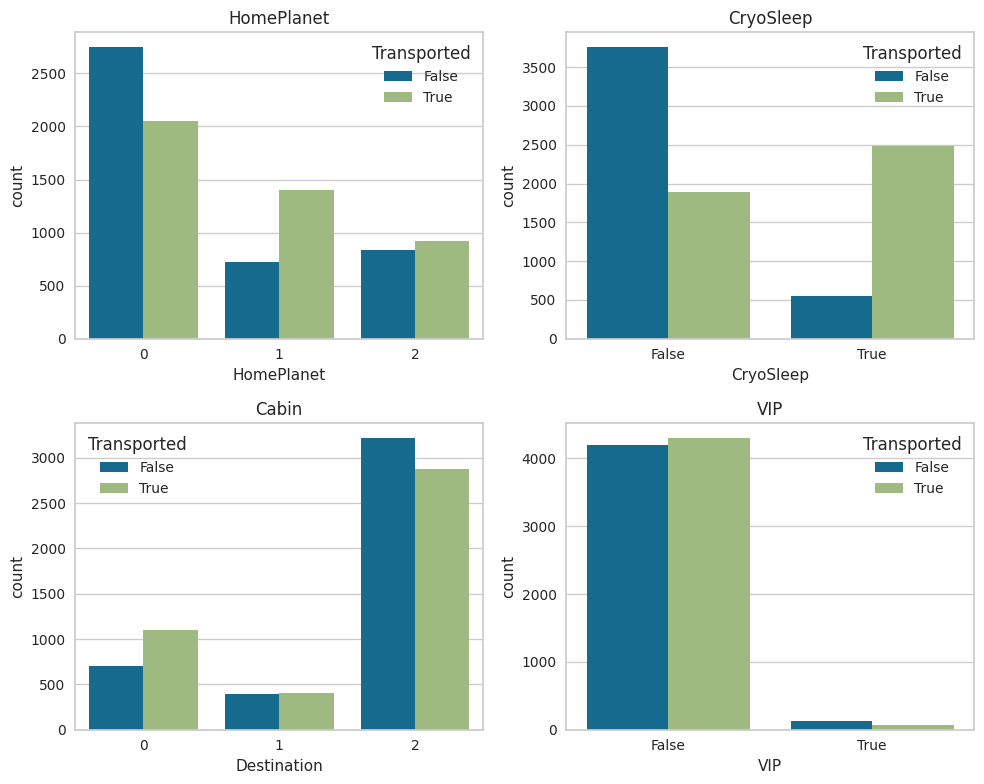

In [109]:
## Checking transported on not based on features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

sns.countplot(x='HomePlanet', hue='Transported', data=train_data, ax=axes[0,0])
axes[0,0].set_title('HomePlanet')

sns.countplot(x='CryoSleep', hue='Transported', data=train_data, ax=axes[0,1])
axes[0,1].set_title('CryoSleep')

sns.countplot(x='Destination', hue='Transported', data=train_data, ax=axes[1,0])
axes[1,0].set_title('Cabin')

sns.countplot(x='VIP', hue='Transported', data=train_data, ax=axes[1,1])
axes[1,1].set_title('VIP')

plt.tight_layout()

Transported
True     4378
False    4315
Name: count, dtype: int64


<Axes: xlabel='Transported', ylabel='count'>

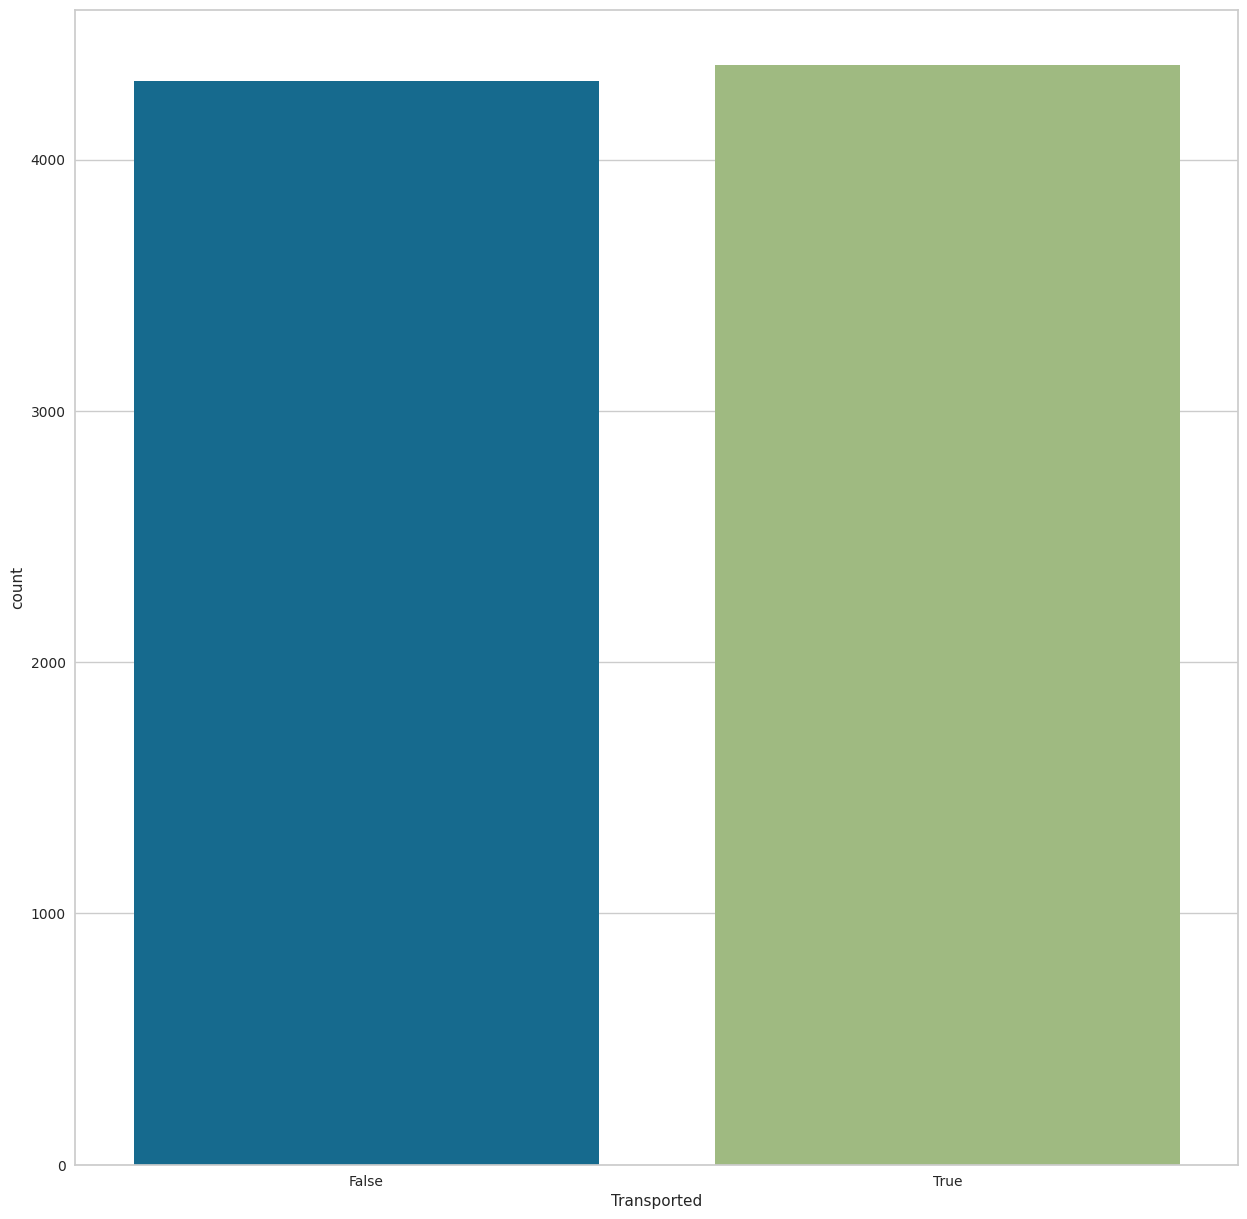

In [110]:
print(train_data['Transported'].value_counts())
sns.countplot(x='Transported',data=train_data)

<Axes: >

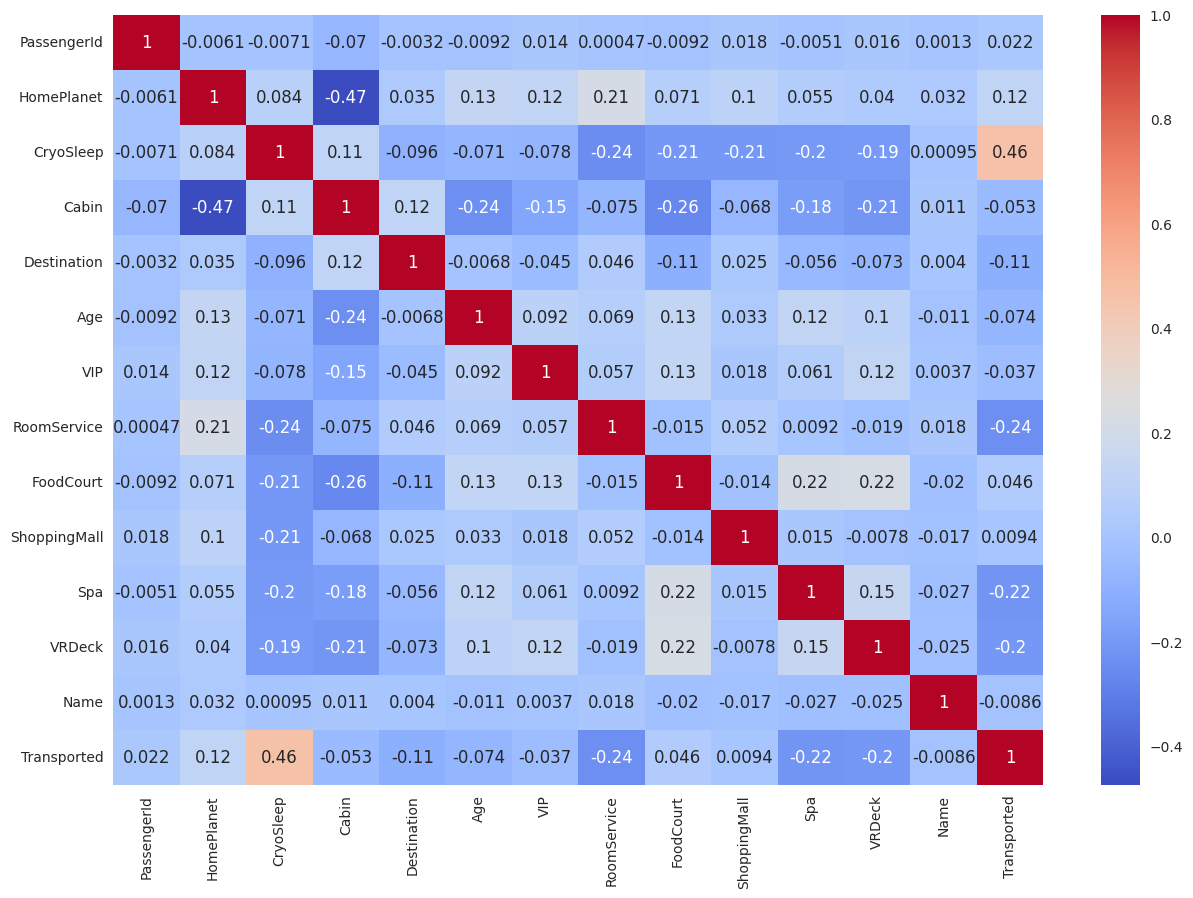

In [111]:
## Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

##### Checking feature correlation using yellow brick

In [112]:
# Checking the different values available for a feature
unique_values_HomePlanet = train_data['HomePlanet'].unique()
unique_values_HomePlanet_count = train_data[train_data['HomePlanet']=="Europa"]
print(f"HomePlanet Unique Values: {unique_values_HomePlanet}, HomePlanet Europa Count: {unique_values_HomePlanet_count.shape[0]}" )

unique_values_CryoSleep = train_data['CryoSleep'].unique()
unique_values_CryoSleep_count = train_data[train_data['CryoSleep']=="True"]
print(f"CryoSleep Unique Values: {unique_values_CryoSleep}, CryoSleep yes Count: {unique_values_CryoSleep_count.shape[0]}" )


HomePlanet Unique Values: [1 0 2], HomePlanet Europa Count: 0
CryoSleep Unique Values: [False  True], CryoSleep yes Count: 0


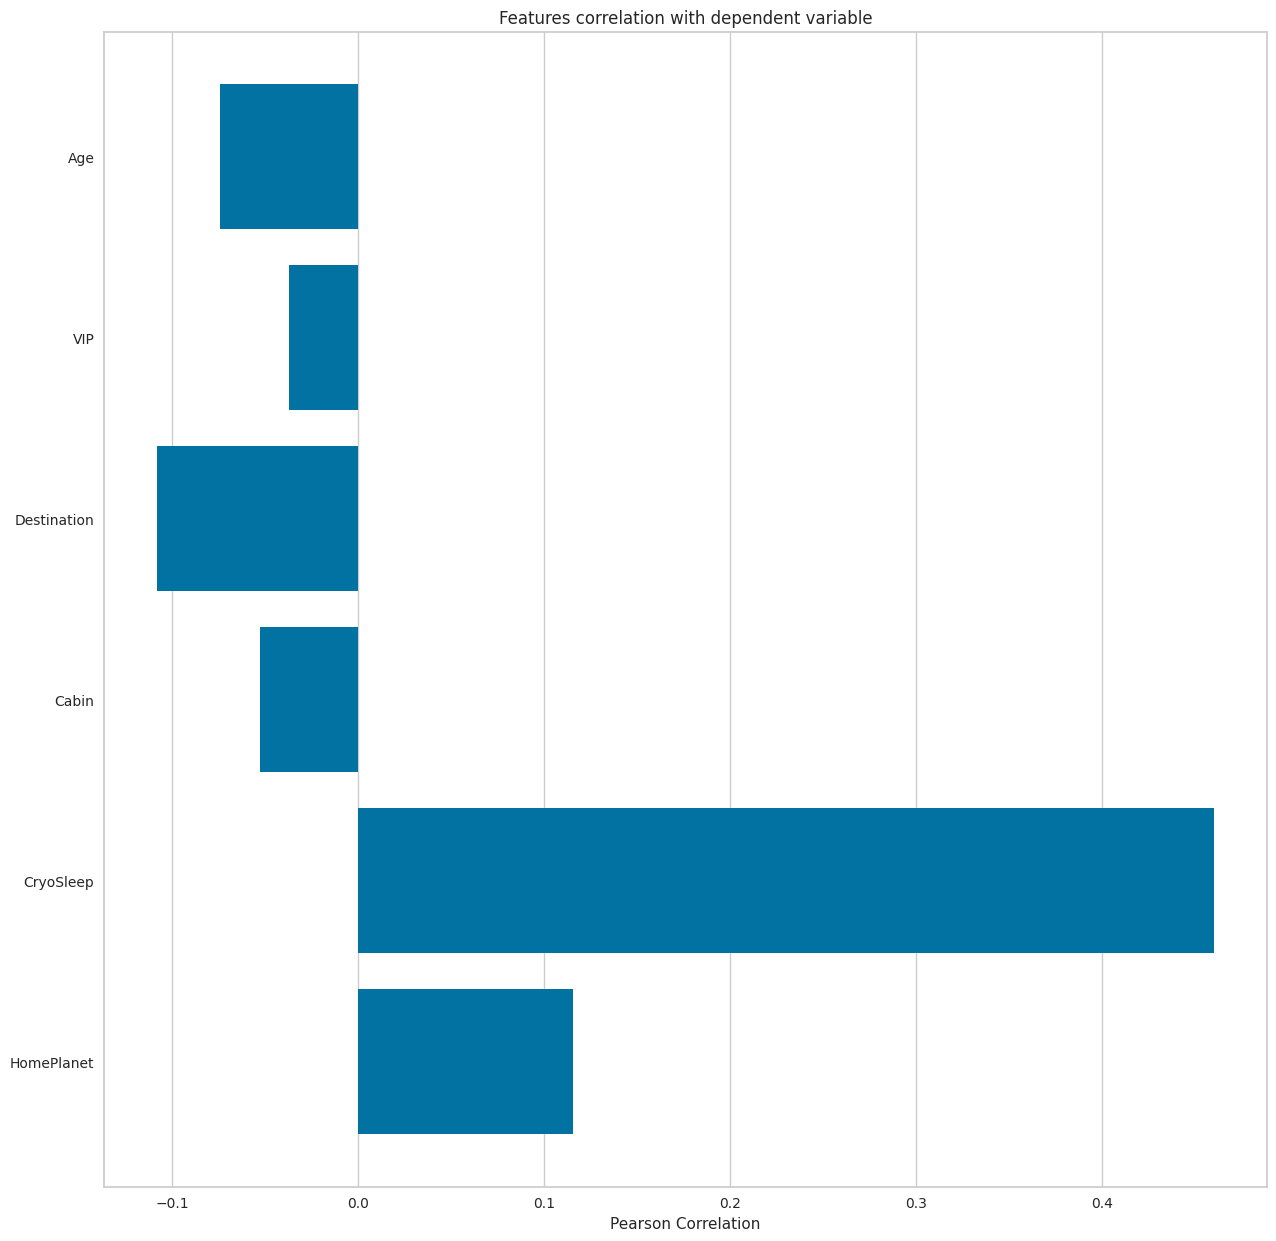

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [113]:
from yellowbrick.target import FeatureCorrelation


feature_names = ['HomePlanet','CryoSleep','Cabin','Destination','VIP','Age']

X, y = train_data[feature_names], train_data['Transported']

# List of feature names
features = np.array(feature_names)

# Instantiating the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize'] = (15,15)

# Fitting data into the visualizer
visualizer.fit(X,y)
visualizer.show()

# Data Splitting

In [114]:
train_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,1,False,149,2,39.0,False,0.0,0.0,0.0,0.0,0.0,5252,False
1,1,0,False,2184,2,24.0,False,109.0,9.0,25.0,549.0,44.0,4502,True
2,2,1,False,1,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,457,False
3,3,1,False,1,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,7149,False
4,4,0,False,2186,2,16.0,False,303.0,70.0,151.0,565.0,2.0,8319,True


# Data scaling

In [115]:
X_train_data = train_data.drop(['Transported', 'PassengerId','Name', 'ShoppingMall'], axis=1)
X_test_data = test_data.drop(['PassengerId','Name', 'ShoppingMall'], axis=1)
y_train = train_data['Transported'] 

scaling = StandardScaler()
X_train_data = scaling.fit_transform(X_train_data)
X_test_data = scaling.fit_transform(X_test_data)

## Model

In [116]:
# Splitting into test and validation sets
X_train_data, X_val, y_train, y_val = train_test_split(X_train_data, y_train, test_size=0.2, random_state=42)

In [117]:
def plotResults(parameters_list, name):
    plt.title('Train and Validation Metrics')
    plt.xlabel(name)
    plt.ylabel('accuracy')
    plt.xticks(ticks = range(len(parameters_list)), labels=parameters_list)
    plt.plot(accuracy_list_train)
    plt.plot(accuracy_list_val)
    plt.legend(['Train', 'Validation'])

#### MLP Classifier

In [118]:
## Without standard scaling data
# y = train_data['Transported']
# features = ['HomePlanet','CryoSleep','VIP']
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])


## After standard scaling


#model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7, 2), random_state=1, max_iter=200000)
model = MLPClassifier(solver='lbfgs', alpha=0.0001, hidden_layer_sizes=(7, 2), random_state=42, max_iter=100000)
model.fit(X_train_data,y_train)
accuracy_train = accuracy_score(model.predict(X_train_data), y_train)
accuracy_validation = accuracy_score(model.predict(X_val), y_val)
print(f"Train accuracy: {accuracy_train:.4f}\nval accuracy: {accuracy_validation:.4f}")


Train accuracy: 0.7958
val accuracy: 0.7757


In [119]:
predictions = model.predict(X_test_data)

output = pd.DataFrame({'PassengerId':test_data.PassengerId,'Transported':predictions})
output.to_csv('submission1.csv',index=False)
print('Submission Sucessfully Saved')

Submission Sucessfully Saved


#### Gradient Boosting

In [120]:
## Without standard scaling data
# y = train_data['Transported']
# features = ['HomePlanet','CryoSleep','VIP']
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

#model = GradientBoostingClassifier(n_estimators=10000, learning_rate=0.5, max_depth=3, random_state=42)
#model.fit(X_train_data,y_train)


In [121]:
# predictions = model.predict(X_test_data)

# output = pd.DataFrame({'PassengerId':test_data.PassengerId,'Transported':predictions})
# output.to_csv('submission2.csv',index=False)
# print('Submission Sucessfully Saved')

#### XGB 

In [122]:
## Without standard scaling data
# y = train_data['Transported']
# features = ['HomePlanet','CryoSleep','VIP']
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

model = XGBClassifier(n_estimators=80, learning_rate=0.1, verbosity=1, random_state=42)
model.fit(X_train_data,y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-logloss:0.65424
[1]	validation_0-logloss:0.62241
[2]	validation_0-logloss:0.59625
[3]	validation_0-logloss:0.57366
[4]	validation_0-logloss:0.55455
[5]	validation_0-logloss:0.53819
[6]	validation_0-logloss:0.52474
[7]	validation_0-logloss:0.51291
[8]	validation_0-logloss:0.50262
[9]	validation_0-logloss:0.49301
[10]	validation_0-logloss:0.48536
[11]	validation_0-logloss:0.47848
[12]	validation_0-logloss:0.47212
[13]	validation_0-logloss:0.46654
[14]	validation_0-logloss:0.46164
[15]	validation_0-logloss:0.45722
[16]	validation_0-logloss:0.45319
[17]	validation_0-logloss:0.44991
[18]	validation_0-logloss:0.44700
[19]	validation_0-logloss:0.44412
[20]	validation_0-logloss:0.44204
[21]	validation_0-logloss:0.44005
[22]	validation_0-logloss:0.43782
[23]	validation_0-logloss:0.43621
[24]	validation_0-logloss:0.43405
[25]	validation_0-logloss:0.43259
[26]	validation_0-logloss:0.43115
[27]	validation_0-logloss:0.43035
[28]	validation_0-logloss:0.42919
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [123]:
accuracy_train = accuracy_score(model.predict(X_train_data), y_train)
accuracy_validation = accuracy_score(model.predict(X_val), y_val)
print(f"Train accuracy: {accuracy_train:.4f}\nval accuracy: {accuracy_validation:.4f}")

Train accuracy: 0.8489
val accuracy: 0.7855


In [125]:
predictions = model.predict(X_test_data)

output = pd.DataFrame({'PassengerId':test_data.PassengerId,'Transported':predictions})
output['Transported'] = output['Transported'].astype(bool)

output.to_csv('submission3.csv',index=False)
print('Submission Sucessfully Saved')

Submission Sucessfully Saved


#### Random Forest

In [126]:
minimum_samples_split_list = [0.00001,0.0001,0.001]
maximum_depth_list = [2,4,8,16,32,64,None]
n_estimators_list = [20,50,100,500,1000]

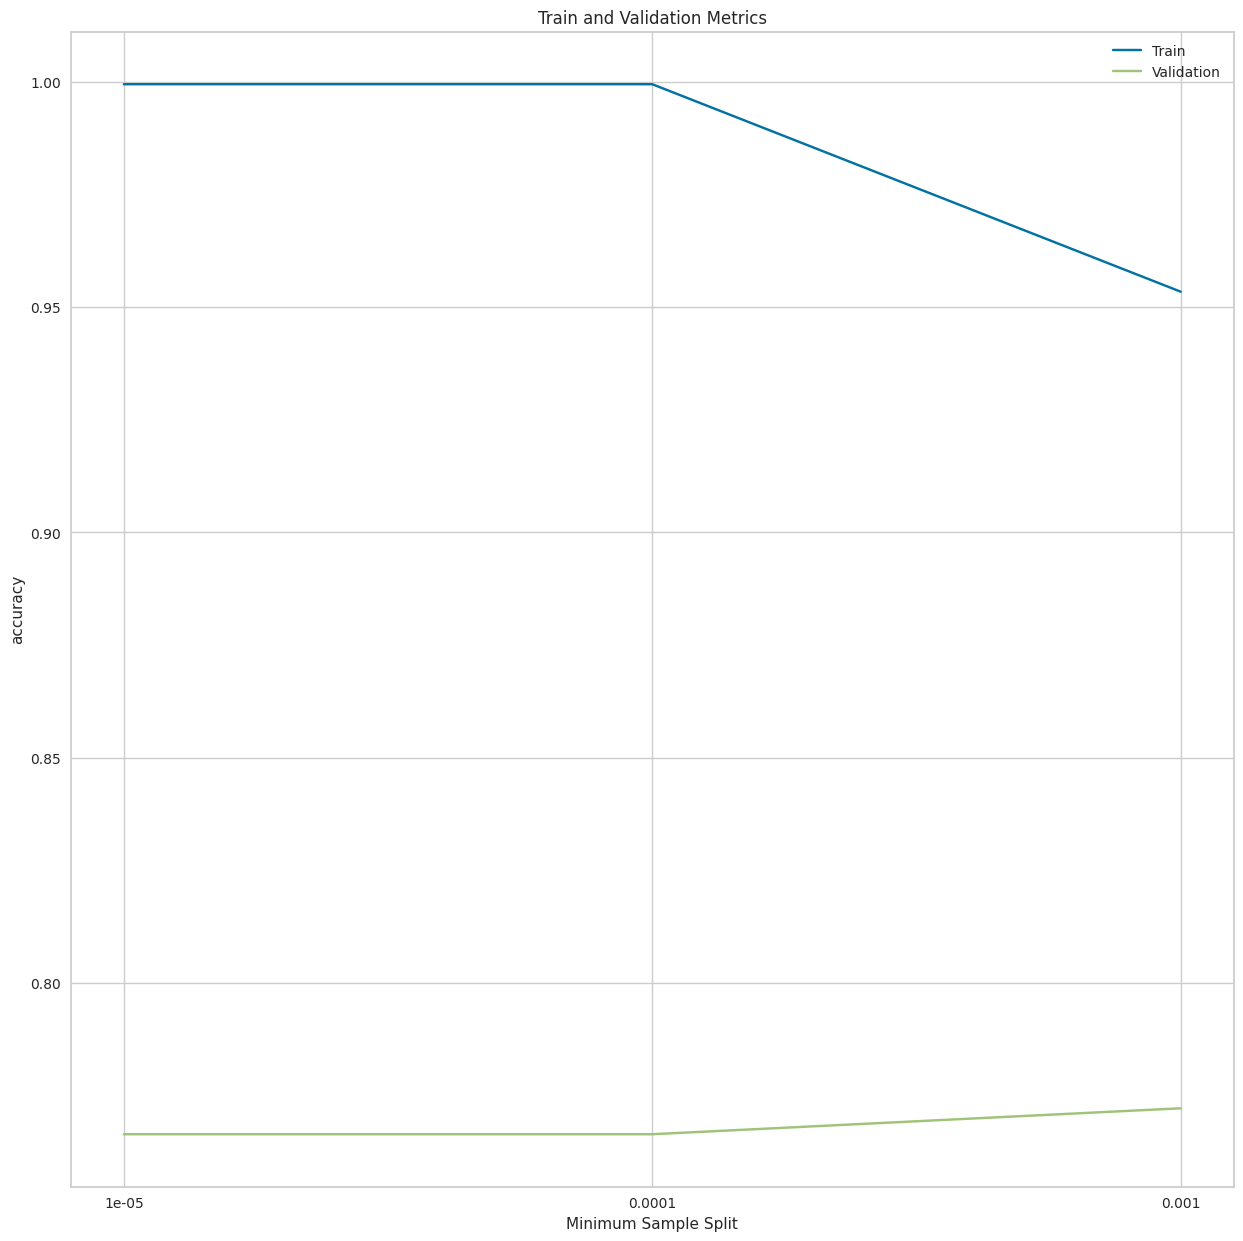

In [127]:
accuracy_list_train = []
accuracy_list_val = []

for minimum_samples_split in minimum_samples_split_list:
    model = RandomForestClassifier(min_samples_split = minimum_samples_split, random_state=42).fit(X_train_data, y_train)
    predictions_train = model.predict(X_train_data)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plotResults(minimum_samples_split_list, "Minimum Sample Split")

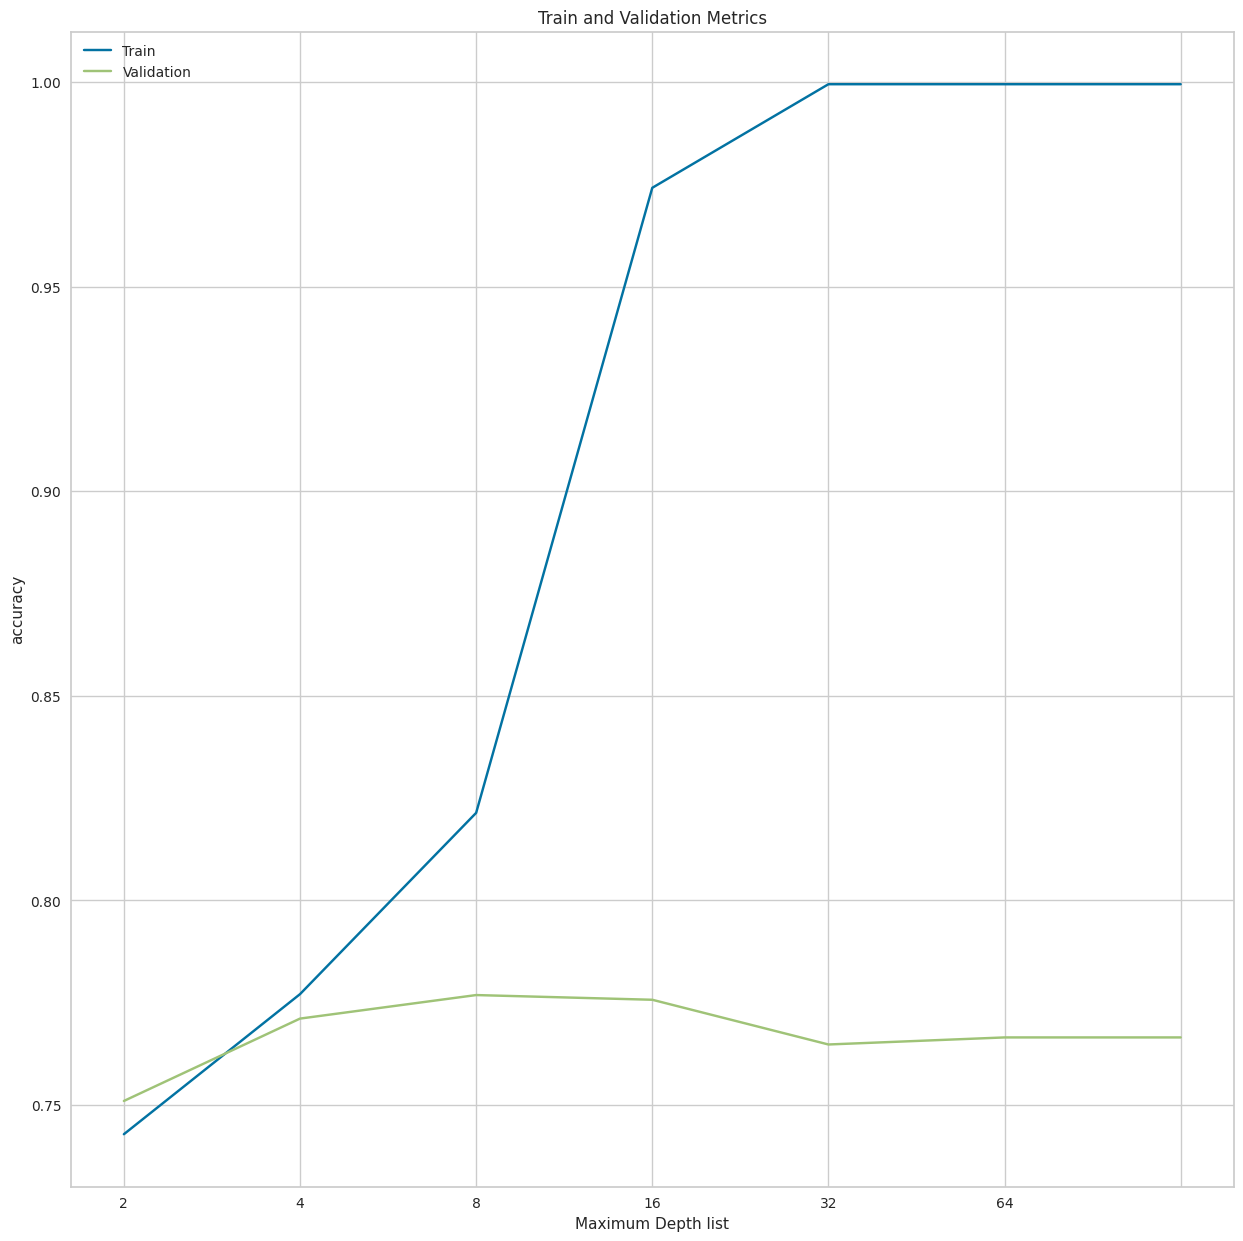

In [128]:
accuracy_list_train = []
accuracy_list_val = []

for max_depth in maximum_depth_list:
    model = RandomForestClassifier(max_depth = max_depth, random_state=42).fit(X_train_data, y_train)
    predictions_train = model.predict(X_train_data)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plotResults(maximum_depth_list, "Maximum Depth list")

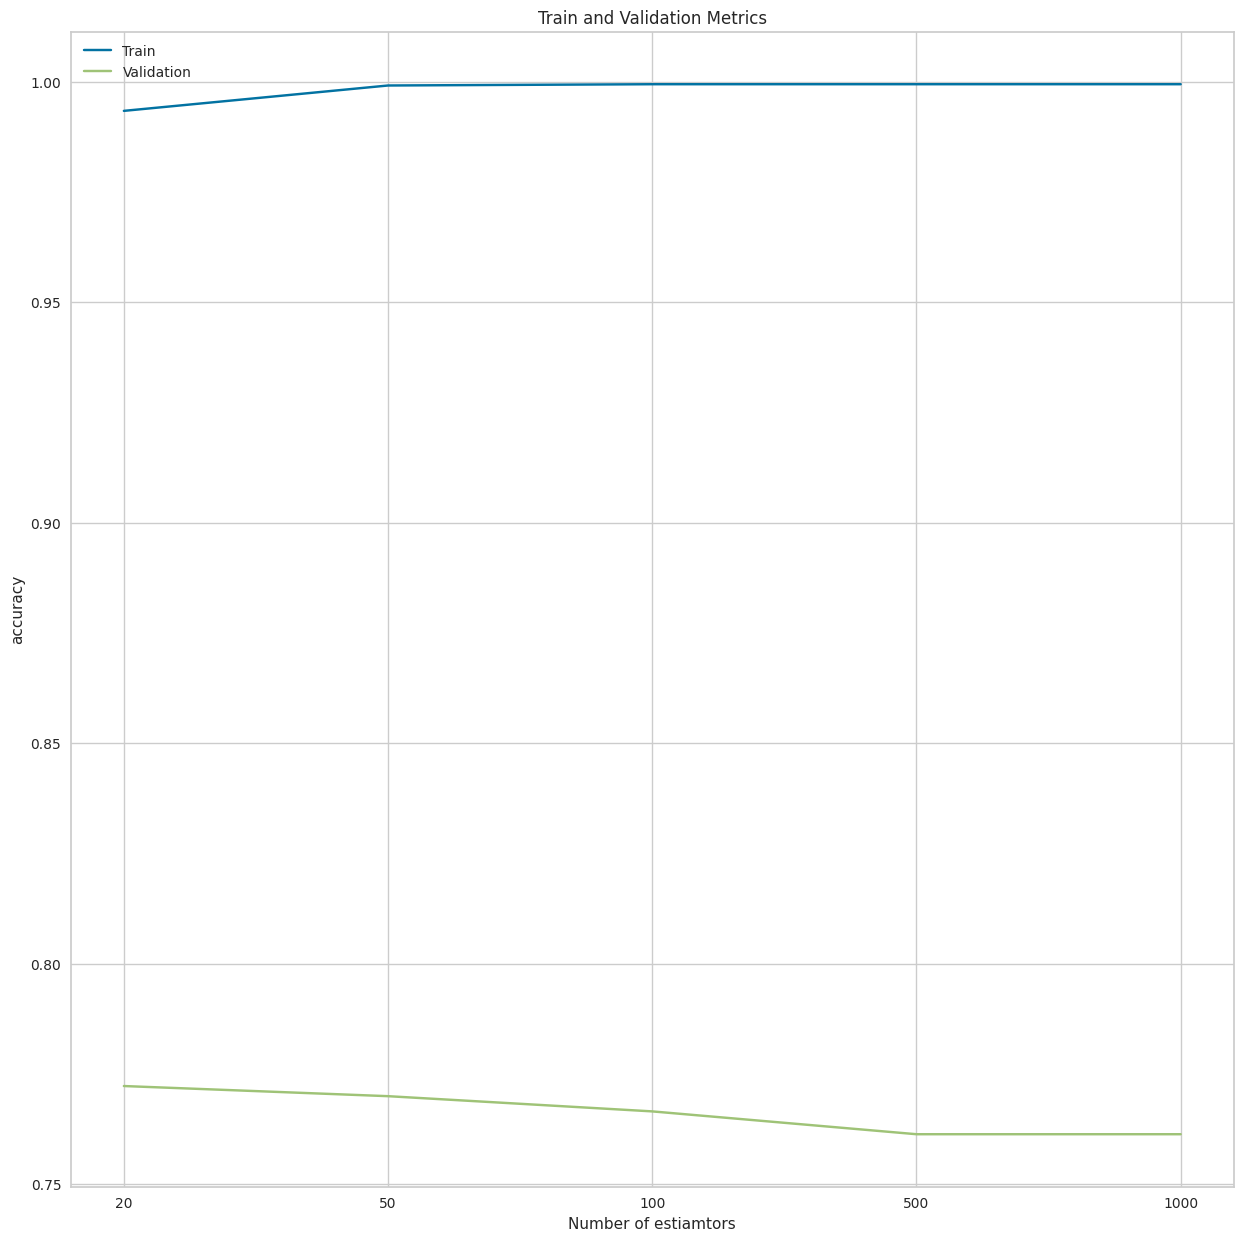

In [129]:
accuracy_list_train = []
accuracy_list_val = []

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators, random_state=42).fit(X_train_data, y_train)
    predictions_train = model.predict(X_train_data)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plotResults(n_estimators_list, "Number of estiamtors")

In [130]:
model = RandomForestClassifier(n_estimators=100, max_depth=64, min_samples_split=0.001).fit(X_train_data, y_train)
accuracy_train = accuracy_score(model.predict(X_train_data), y_train)
accuracy_validation = accuracy_score(model.predict(X_val), y_val)
print(f"Train accuracy: {accuracy_train:.4f}\nval accuracy: {accuracy_validation:.4f}")

Train accuracy: 0.9541
val accuracy: 0.7694


In [131]:
predictions = model.predict(X_test_data)

output = pd.DataFrame({'PassengerId':test_data.PassengerId,'Transported':predictions})
output['Transported'] = output['Transported'].astype(bool)

output.to_csv('submission4.csv',index=False)
print('Submission Sucessfully Saved')

Submission Sucessfully Saved


#### Version 14: All the models gave similar results, therefore we need to do more data cleanup and preprocessing
#### Version 23: There is improvcement after preprocessing, but it stagnates after 7 hidden layers